  # Optimizing crop production

Understand the problem statement of this project:-
------------------------------------------------------------------------    

Agriculture is the art and science of cultivating the soil, growing crops and raising livestock.

Agriculture is the process of producing food, fiber and many other desired products by the cultivation of certain plants.

Agriculture makes us less dependent on other foreign countries as it provides food and also provides income to farmers and
revenue to the government.

You need to analyze these conditions and form clusters of crops which helps understand which group of crops require similar
kinds of conditions to grow.

You will be using K-Means clustering for this and form clusters.

K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning
or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with 
the Python implementation of k-means clustering.

Determines the best value for K center points or centroids by an iterative process.
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

After you analyze the different climatic conditions required for different crops, you will perform multi-class classification
and will predict which crop can be grown with given climatic conditions.
 
Description for each of the column: -
-----------------------------------------------------    

“N” which represents the ratio of Nitrogen content in the soil.

“P” represents the ratio of Phosphorus content in the soil.

“K” column represents the ratio of Potassium content in the soil.

“Temperature” is the temperature in degrees celsius.

“Humidity” is the relative humidity in Percentage. 6. “Ph” represents the ph value of the soil.

“Rainfall” is the rainfall in mm.

“label” column contains the names of different crops grown in these particular conditions.
 

# Importing libraries

In [1]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact

# Reading the dataset


In [2]:
# Loading the dataset
crop =pd.read_excel("data.xlsx")

In [3]:
# Lets check the shape of the data set
crop.shape

(2200, 8)

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#checking null values
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Descriptive statistics

A descriptive statistics is a summary statistics that quantitatively describes or summarizes features from a collection of information like Mean(),Sum(),Median()

In [6]:
#Finding the columns
crop.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
#Finding the average ratio for numerical columns

print("Average Ratio of Nitrogen    in the Soil : {0:.2f}".format(crop["N"].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(crop["P"].mean()))
print("Average Ratio of Potassium   in the Soil : {0:.2f}".format(crop["K"].mean()))
print("Average Ratio of temperature in the Soil : {0:.2f}".format(crop["temperature"].mean()))
print("Average Ratio of humidity    in the Soil : {0:.2f}".format(crop["humidity"].mean()))
print("Average Ratio of ph-value    in the Soil : {0:.2f}".format(crop["ph"].mean()))
print("Average Ratio of rainfall    in the Soil : {0:.2f}".format(crop["rainfall"].mean()))


Average Ratio of Nitrogen    in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium   in the Soil : 48.15
Average Ratio of temperature in the Soil : 25.62
Average Ratio of humidity    in the Soil : 71.48
Average Ratio of ph-value    in the Soil : 6.47
Average Ratio of rainfall    in the Soil : 103.46


In [8]:
print("{0:.2f}:".format(crop['N'].mean()))

50.55:


In [9]:
#Finding th sum for numerical columns

print("Sum of Nitrogen     in the Soil : {0:.2f}".format(crop["N"].sum()))
print("Sum of Phosphorous  in the Soil : {0:.2f}".format(crop["P"].sum()))
print("Sum of Potassium    in the Soil : {0:.2f}".format(crop["K"].sum()))
print("Sum of temperature  in the Soil : {0:.2f}".format(crop["temperature"].sum()))
print("Sum of humidity     in the Soil : {0:.2f}".format(crop["humidity"].sum()))
print("Sum of ph-value     in the Soil : {0:.2f}".format(crop["ph"].sum()))
print("Sum o  rainfall     in the Soil : {0:.2f}".format(crop["rainfall"].sum()))




Sum of Nitrogen     in the Soil : 111214.00
Sum of Phosphorous  in the Soil : 117398.00
Sum of Potassium    in the Soil : 105928.00
Sum of temperature  in the Soil : 56355.74
Sum of humidity     in the Soil : 157259.91
Sum of ph-value     in the Soil : 14232.86
Sum o  rainfall     in the Soil : 227620.04


In [10]:
#Finding the median for numerical columns

print("Median of Nitrogen     in the Soil : {0:.2f}".format(crop["N"].median()))
print("Median of Phosphorous  in the Soil : {0:.2f}".format(crop["P"].median()))
print("Median of Potassium    in the Soil : {0:.2f}".format(crop["K"].median()))
print("Median of temperature  in the Soil : {0:.2f}".format(crop["temperature"].median()))
print("Median of humidity     in the Soil : {0:.2f}".format(crop["humidity"].median()))
print("Median of ph-value     in the Soil : {0:.2f}".format(crop["ph"].median()))
print("Median of rainfall     in the Soil : {0:.2f}".format(crop["rainfall"].median()))


Median of Nitrogen     in the Soil : 37.00
Median of Phosphorous  in the Soil : 51.00
Median of Potassium    in the Soil : 32.00
Median of temperature  in the Soil : 25.60
Median of humidity     in the Soil : 80.47
Median of ph-value     in the Soil : 6.43
Median of rainfall     in the Soil : 94.87


In [11]:
# lets check the Summary Statistics for each of the Crops

In [12]:
crop.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
#Using pywidgets we are creating the dropdown menu
@interact

def summary(items = list(crop['label'].value_counts().index)):
    x = crop[crop['label'] == items]
    
    
    print("Statistics of Nitrogen")
    print("Minimum Nitrogen required : {0:.2f}".format(x['N'].min()))
    print("Maximum Nitrogen required : {0:.2f}".format(x['N'].max()))
    print("Average of Nitrogen required : {0:.2f}".format(x['N'].mean()))
     
    
    print("\nStatistics of Phosporous")
    print("Minimum Phosporous required : {0:.2f}".format(x['P'].min()))
    print("Maximum Phosporous required : {0:.2f}".format(x['P'].max()))
    print("Average of Phosporous required : {0:.2f}".format(x['P'].mean()))
    
    print("\nStatistics of Potassium")
    print("Minimum Potassium required : {0:.2f}".format(x['K'].min()))
    print("Maximum Potassium  required : {0:.2f}".format(x['K'].max()))
    print("Average of Potassium  required : {0:.2f}".format(x['K'].mean()))
    
    print("\nStatistics of temperature ")
    print("Minimum temperaturerequired : {0:.2f}".format(x['temperature'].min()))
    print("Maximum temperature required : {0:.2f}".format(x['temperature'].max()))
    print("Average of temperature required : {0:.2f}".format(x['temperature'].mean()))
    
    
    print("\nStatistics of humidity ")
    print("Minimum humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Maximum humidity required : {0:.2f}".format(x['humidity'].max()))
    print("Average of humidity required : {0:.2f}".format(x['humidity'].mean()))
    
    print("\nStatistics of ph ")
    print("Minimum ph required : {0:.2f}".format(x['ph'].min()))
    print("Maximum ph required : {0:.2f}".format(x['ph'].max()))
    print("Average of ph required : {0:.2f}".format(x['ph'].mean()))
    
    print("\nStatistics of rainfall ")
    print("Minimum rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Maximum rainfall required : {0:.2f}".format(x['rainfall'].max()))
    print("Average of rainfall required : {0:.2f}".format(x['rainfall'].mean()))

interactive(children=(Dropdown(description='items', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [14]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for","{0:.2f}".format(crop[conditions].mean()))
    print("\nCrops which require greater than average", conditions,'\n')
    print(crop[crop[conditions] > crop[conditions].mean()]['label'].unique())
    print("\nCrops which require less than average", conditions,'\n')
    print(crop[crop[conditions] <= crop[conditions].mean()]['label'].unique())
    print("\nRice : {0:.2f}".format(crop[(crop['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(crop[(crop['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(crop[(crop['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(crop[(crop['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(crop[(crop['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(crop[(crop['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(crop[(crop['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(crop[(crop['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(crop[(crop['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(crop[(crop['label'] == 'watermelon')][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(crop[(crop['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(crop[(crop['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(crop[(crop['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(crop[crop['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(crop[(crop['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(crop[(crop['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(crop[(crop['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(crop[(crop['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(crop[(crop['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(crop[(crop['label'] == 'mango')][conditions].mean()))    
    print("Pomegranate : {0:.2f}".format(crop[(crop['label'] == 'pomegranate')][conditions].mean()))    
    print("Coffee : {0:.2f}".format(crop[(crop['label'] == 'coffee')][conditions].mean()))
    
    


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [15]:
#lets check the aggregation of the numerical columns
@interact
def Aggregation (conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("standard deviation for","{0:.2f}".format(crop[conditions].std()))
    print("mean               for","{0:.2f}".format(crop[conditions].mean()))
    print("median             for","{0:.2f}".format(crop[conditions].median()))
    print("max                for :","{0:.2f}".format(crop[conditions].max()))
    print("min                for:","{0:.2f}" .format(crop[conditions].min()))
    print("variance           for","{0:.2f}".format(crop[conditions].var()))
    print("skewness           for","{0:.2f}".format(crop[conditions].skew()))
    print("kurtosis           for","{0:.2f}".format(crop[conditions].kurt()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Analyzing Agricultural Conditions

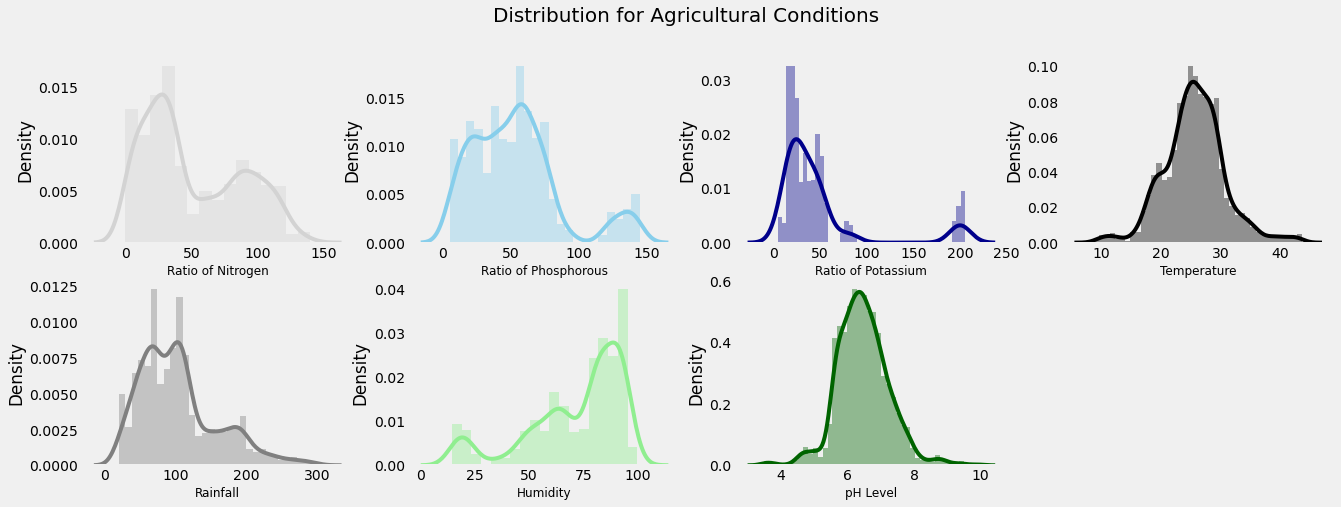

In [16]:
# Lets check the distribution of Agricultural Conditions
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 7)

plt.subplot(2, 4, 1)
sns.distplot(crop['N'], color = 'lightgrey')
plt.plot(markerfacecolor='blue', markersize=5, marker='o')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()


plt.subplot(2, 4, 2)
sns.distplot(crop['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(crop['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(crop['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(crop['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(crop['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(crop['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()




In [17]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil   :", crop[crop['N'] < 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", crop[crop['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil  :", crop[crop['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall                            :", crop[crop['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature                          :", crop[crop['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature                         :", crop[crop['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity                             :", crop[crop['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH                                   :", crop[crop['ph'] < 4]['label'].unique())
print("Crops which requires very High pH                                  :", crop[crop['ph'] > 9]['label'].unique())


Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil   : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil  : ['grapes' 'apple']
Crops which requires very High Rainfall                            : ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature                          : ['grapes']
Crops which requires very High Temperature                         : ['grapes' 'papaya']
Crops which requires very Low Humidity                             : ['chickpea' 'kidneybeans']
Crops which requires very Low pH                                   : ['mothbeans']
Crops which requires v

In [18]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("\nWinter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] > 30)]['label'].unique())
print("\nRainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']

Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']

Rainy Crops
['rice' 'papaya' 'coconut']


# clustering crops

In [19]:
### Lets try to Cluster these Crops


# Lets select the Spending score, and Annual Income Columns from the Data
x = crop.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_crop  = pd.DataFrame(x)
x_crop.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


# K-means is an unsupervised learning method for clustering data points. 
#The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.
#reassign each data point to the cluster with the closest centroid

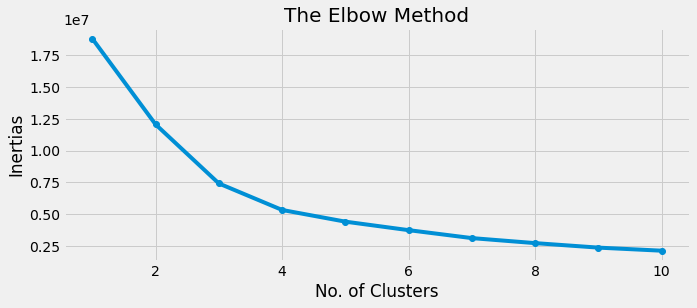

In [20]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_crop)
    inertias.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), inertias, marker='o')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertias')
plt.show()

In [21]:
# lets implement the K Means algorithm to perform Clustering analysis

#Soft clustering-Sometimes we don’t need a binary answer. 
#Soft clustering is about grouping the data items such that an item can exist in multiple clusters.

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x_crop)
print(y_means)

[3 3 3 ... 3 1 3]


In [22]:
# lets find out the Results

a = crop['label']
y_means = pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis = 1)
print(z)

      0   label
0     3    rice
1     3    rice
2     3    rice
3     3    rice
4     3    rice
...  ..     ...
2195  3  coffee
2196  1  coffee
2197  3  coffee
2198  1  coffee
2199  3  coffee

[2200 rows x 2 columns]


In [23]:
#renaming the columns 0 as cluster in dataframe

z= z.rename(columns = {0: 'cluster'})
pd.set_option('display.max_columns', 2500, 'display.width', 2500, 'display.max_rows',2500)
print(z)

      cluster        label
0           3         rice
1           3         rice
2           3         rice
3           3         rice
4           3         rice
5           3         rice
6           3         rice
7           3         rice
8           3         rice
9           3         rice
10          3         rice
11          3         rice
12          3         rice
13          3         rice
14          3         rice
15          3         rice
16          3         rice
17          3         rice
18          3         rice
19          3         rice
20          3         rice
21          3         rice
22          3         rice
23          3         rice
24          3         rice
25          3         rice
26          3         rice
27          3         rice
28          3         rice
29          3         rice
30          3         rice
31          3         rice
32          3         rice
33          3         rice
34          3         rice
35          3         rice
3

In [24]:
# lets check the Clusters of each Crops

print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("\nCrops in First Cluster   :", z[z['cluster'] == 0]['label'].unique())
print("\nCrops in Second Cluster  :", z[z['cluster'] == 1]['label'].unique())
print("\nCrops in Third Cluster   :", z[z['cluster'] == 2]['label'].unique())
print("\nCrops in Forth Cluster   :", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 


Crops in First Cluster   : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']

Crops in Second Cluster  : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']

Crops in Third Cluster   : ['grapes' 'apple']

Crops in Forth Cluster   : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


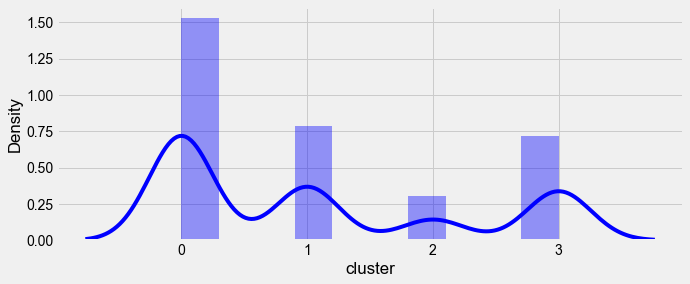

In [25]:
#to visualize four clusters using seaborn

import seaborn as sns
sns.distplot(z['cluster'],kde = True, color ='blue', bins = 10)# kde='Kernel density estimation'
sns.set_style('whitegrid')


In [26]:
#Hard clustering -Hard clustering is about grouping the data items such that each item is only assigned to one cluster. 
#As an instance,we want the algorithm to read all of the tweets and determine if a tweet is a positive or a negative tweet

print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 4:", list(d.index))

Results for Hard Clustering

Crops in Cluster 1: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 3: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


# Visualizing the Hidden Patterns

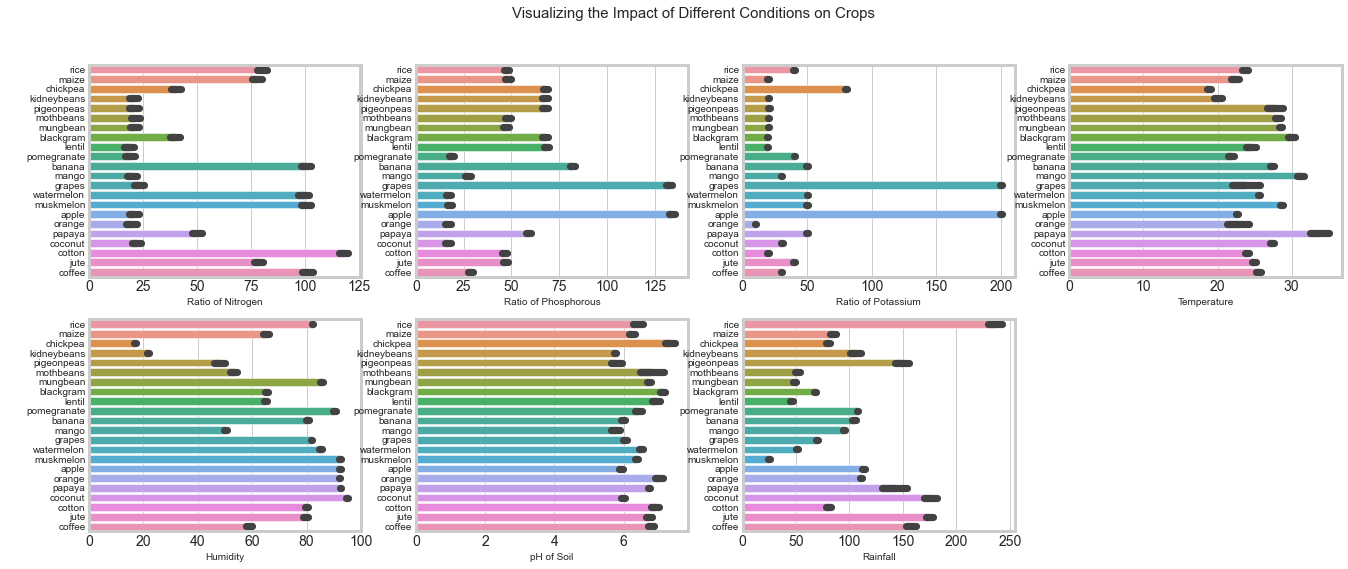

In [36]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (20, 8)

plt.subplot(2, 4, 1)
sns.barplot(crop['N'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(crop['P'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(crop['K'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(crop['temperature'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(crop['humidity'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(crop['ph'], crop['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(crop['rainfall'], crop['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

# Predictive Modelling

In [37]:
# lets split the Dataset for Predictive Modelling

y = crop['label']
x = crop.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [38]:
# lets create Training and Testing Sets for Validation of Results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [39]:
# lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

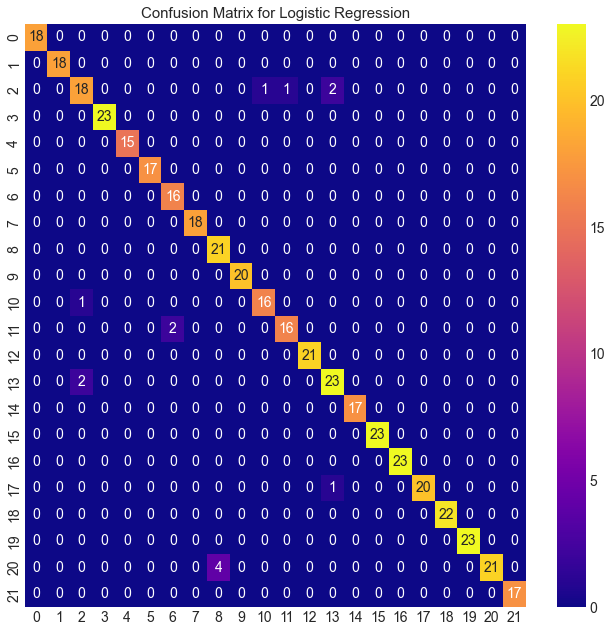

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [47]:
# lets evaluate the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'plasma')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# lets print the Classification Report also
cr = classification_report(y_test, y_pred)
print(cr)

# Real time Predictions

In [32]:
# lets check the Head of the Dataset
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [33]:
prediction = model.predict((np.array([[90,40,20,80,7,200]])))                                       
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [34]:
# lets check the Model for Oranges also
crop[crop['label'] == 'orange'].head()


,N,P,K,temperature,humidity,ph,rainfall,label
1600,22.0,30.0,12.0,15.781442,92.510777,6.354007,119.035002,orange
1601,37.0,6.0,13.0,26.030973,91.508193,7.511755,101.284774,orange
1602,27.0,13.0,6.0,13.360506,91.356082,7.335158,111.226688,orange
1603,7.0,16.0,9.0,18.879577,92.043045,7.813917,114.665951,orange
1604,20.0,7.0,9.0,29.477417,91.578029,7.129137,111.172750,orange


In [35]:
# lets do some Real time Predictions
prediction = model.predict((np.array([[20,30,10,15,90,7.5,100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']


In [42]:
# lets do some Real time Predictions  
prediction = model.predict((np.array([[80,43,16,23.5,71.5,6.6,65]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['cotton']


Conclusion:-
------------------    
    
Some of the important key points in this project  were:-

We learnt about the use of statistics in summarizing the major facts about the data.
We got general information about the conditions to be taken care of while growing different crops.
We learnt the use of ipywidgets to make the functions more interactive to the user.
We learnt about clustering analysis and applied in the data to form clusters of crops.
We learnt the difference between soft clustering and hard clustering.
We learnt the importance of Data Visualization to find hidden patterns from the data.
We learnt how to apply Logistic Regression to solve a real life problem.
We also learnt about the evaluation metrics used for Classification problems.